<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

We used 3  different datasets for the exploratory data analysis.
1. UN general Debate Corpus
2. Democracy index dataset
3. Global terrorism dataset

We are using the *the UN General Debate Corpus (UNGDC)*, which introduces the corpus of texts of UN General Debate statements from 1970 (Session 25) to 2020 (Session 75). More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y).

In [1]:
# Loading all the necessary libraries to work with.

import os
import seaborn as sns
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

  
from scipy.stats import pearsonr
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import word_tokenize


lemmatiser = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

sns.set_theme()
sns.set_context("paper")

[nltk_data] Downloading package punkt to /Users/jimosine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jimosine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jimosine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jimosine/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Loading all the Speeches from General Debate Corpus

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename))
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

#Creating a dataframe out of all the speeches with respect to year, session, country code and speeches text        

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_speech.head(5)

,Session,Year,ISO-alpha3 Code,Speech
0,25,1970,AUT,155.\t May I begin by expressing to Ambassado...
1,25,1970,MEX,"33.\t Mr. President, I take great pleasure in..."
2,25,1970,COG,122.\t I cannot begin my intervention without...
3,25,1970,DZA,1. The delegation of Algeria is very pleased ...
4,25,1970,LKA,"176.\t Mr. President, the delegation of Ceylon..."


In [3]:
#LOAD DEMOCRACY DATASET

df_EIU = pd.read_csv('EIU Democracy Index.csv')
df_eiu = df_EIU.groupby(['country']).mean()
df_eiu = df_eiu.drop(['year'], axis=1).reset_index()
df_eiu.head(5)

,country,eiu
0,Afghanistan,2.705000
1,Albania,5.847500
2,Algeria,3.620000
3,Angola,3.346667
4,Argentina,6.870000


In [4]:
#LOAD GLOBAL TERRORISM DATASET

df_terror = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', usecols=[
    'iyear', 'country', 'country_txt', 'nkill', 'nwound', 'region', 'region_txt', 'latitude', 'longitude',
    'targtype1_txt', 'gname'
], dtype={
    'iyear': int,
    'country': int,
    'country_txt': str,
    'region': int,
    'region_txt': str,
    'latitude': float,
    'longitude': float,
    'targtype1_txt': str,
    'gname': str
})

df_terror.columns = [
    'year', 'country_iso', 'Country or Area', 'region_iso', 'region',
    'lat', 'lon', 'target', 'group', 'killed', 'wounded'
]# Re-arranging the columns of terrorism dataset

df_terror.head(5)

,year,country_iso,Country or Area,region_iso,region,lat,lon,target,group,killed,wounded
0,1970,58,Dominican Republic,2,Central America & Caribbean,18.456792,-69.951164,Private Citizens & Property,MANO-D,1.0,0.0
1,1970,130,Mexico,1,North America,19.371887,-99.086624,Government (Diplomatic),23rd of September Communist League,0.0,0.0
2,1970,160,Philippines,5,Southeast Asia,15.478598,120.599741,Journalists & Media,Unknown,1.0,0.0
3,1970,78,Greece,8,Western Europe,37.997490,23.762728,Government (Diplomatic),Unknown,NaN,NaN
4,1970,101,Japan,4,East Asia,33.580412,130.396361,Government (Diplomatic),Unknown,NaN,NaN


In [5]:
#LOAD CODES DATASET

df_codes = pd.read_csv('UNSD — Methodology.csv')
df_codes.head(5)

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN,Developing
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing


In [6]:
#Merging df_codes with df_speech

df_un = pd.merge(df_codes, df_speech, how='right', on='ISO-alpha3 Code').set_index(['Year', 'ISO-alpha3 Code'])
df_un.head(5)

,,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries,Session,Speech
Year,ISO-alpha3 Code,,,,,,,,,,,,,,,,,
1970,AUT,1.0,World,150.0,Europe,155.0,Western Europe,NaN,NaN,Austria,40.0,AT,NaN,NaN,NaN,Developed,25,155.\t May I begin by expressing to Ambassado...
1971,AUT,1.0,World,150.0,Europe,155.0,Western Europe,NaN,NaN,Austria,40.0,AT,NaN,NaN,NaN,Developed,26,112.\t Mr. President. I am happy to convey to...
1972,AUT,1.0,World,150.0,Europe,155.0,Western Europe,NaN,NaN,Austria,40.0,AT,NaN,NaN,NaN,Developed,27,"Mr. President, I take the greatest pleasure in..."
1973,AUT,1.0,World,150.0,Europe,155.0,Western Europe,NaN,NaN,Austria,40.0,AT,NaN,NaN,NaN,Developed,28,﻿1.\tThe twenty-eighth session of the General ...
1974,AUT,1.0,World,150.0,Europe,155.0,Western Europe,NaN,NaN,Austria,40.0,AT,NaN,NaN,NaN,Developed,29,"Sir, it is more than a mere custom, and for me..."


We have loaded all the datasets and created dataframes out of it. Now we are going to clean and explore the dataset. 

## How many countries are there in each data frame?

In [7]:
print("Terror list: ",len(df_terror['Country or Area'].unique()))
print("Speeches list: ",len(df_codes['Country or Area'].unique()))
print("Democracy index list: ",len(df_eiu['country'].unique()))

terror_list = df_terror['Country or Area'].unique()
speeches_list = df_codes['Country or Area'].unique() 
eiu_list = df_eiu['country'].unique()

Terror list:  205
Speeches list:  249
Democracy index list:  167


# Data Cleaning and Preprocessing

## Matching country names
While going through the dataset, we found out that Country names are different for each datasets. Here, we are going to match the country names in each datasets that we are going to explore.

In [8]:
#United States of America
df_un = df_un.replace('United States of America', 'US')
df_terror = df_terror.replace('United States', 'US')

#North Korea
df_un = df_un.replace("Democratic People's Republic of Korea", 'North Korea')

#United Kingdom
df_un = df_un.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df_eiu = df_eiu.replace('UK', 'United Kingdom')

# Remove nans and create 'before' variable

Here we are removing the nan values and creating a variable "before" to look at the speeches how they were before 9/11 terrorist attack.  

In [9]:
df_un_clean = df_un.dropna(subset=['Country or Area'])
df_un_clean['Before'] = np.where(df_un_clean.reset_index()['Year'] < 2001, True, False)
#df_un_clean[df_un_clean['Before'] == True] 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Deleting words manually
We are going to remove the non-informative words.

In [10]:
countries = df_un['Country or Area'].unique()
countries = [x.lower() for x in countries if str(x) != 'nan']

to_take_out = ['international', 'organization', 'countries', 'world', 'also', 'nations']

In [11]:
def preprocess(words):
    sw = stopwords.words("english")
    sw += to_take_out
    sw += countries
    no_sw = []
    words = [word.lower() for word in words if word.isalpha()]
    for w in words:
        if (w not in sw):
            w = lemmatiser.lemmatize(w, pos='v')
            no_sw.append(w)
    return no_sw

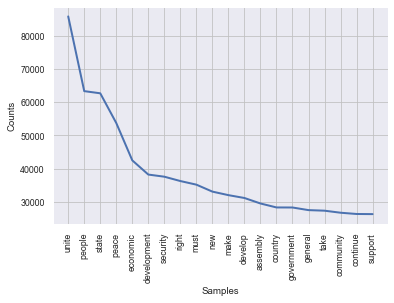

In [12]:
#SPEECHES BEFORE

df_before = df_un_clean[df_un_clean['Before'] == True] 

words_list = []
for i in range(len(df_un_clean[df_un_clean['Before'] == True])-1):
    row = df_before.iloc[i]
    text = row['Speech']
    words = word_tokenize(text)
    words = preprocess(words)
    words_list += words
    
freq_before = FreqDist(words_list)
freq_before.plot(20)

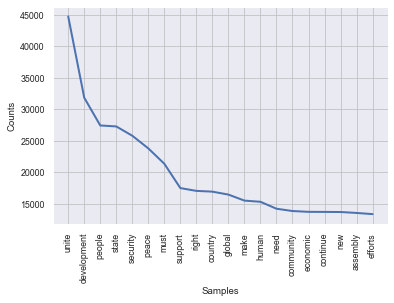

In [13]:
#SPEECHES AFTER
df_after = df_un_clean[df_un_clean['Before'] == False] 

words_list = []
for i in range(len(df_un_clean[df_un_clean['Before'] == False])-1):
    row = df_after.iloc[i]
    text = row['Speech']
    words = word_tokenize(text)
    words = preprocess(words)
    words_list += words
    
freq_after = FreqDist(words_list)
freq_after.plot(20)

In [14]:
most_freq_before = sorted(dict(freq_before), key=dict(freq_before).get, reverse=True)[:200]
most_freq_after = sorted(dict(freq_after), key=dict(freq_after).get, reverse=True)[:200]
both_freq = set(most_freq_after).intersection(set(most_freq_before))

In [15]:
wel_before = set(most_freq_before) - set(most_freq_after)

wel_after = set(most_freq_after) - set(most_freq_before)

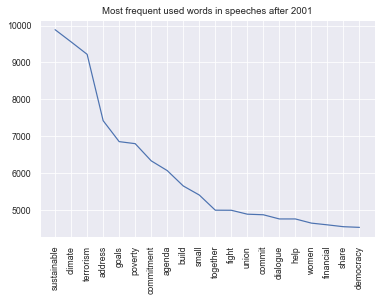

In [16]:
#Get set of interesting words
testje1 = set()
for word in wel_after:
    if word not in both_freq:
        testje1.add(word)

        
#Get frequencies for these interesting words        
a = {}
for word in testje1:
    if word in list(freq_after):
        a[word] = dict(freq_after)[word]
        #print((word, dict(freq_after)[word]))
        
df_a = pd.DataFrame.from_dict(a, orient='index', columns=["Count"])
plt.plot(df_a.sort_values('Count', ascending = False).iloc[0:20])
plt.xticks(rotation=90)
plt.title('Most frequent used words in speeches after 2001')
plt.show()

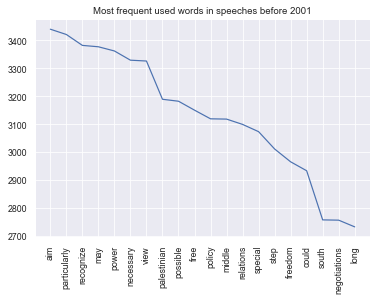

In [17]:
#Get set of interesting words
testje2 = set()
for word in wel_before:
    if word not in both_freq:
        testje2.add(word)

#Get frequencies for these interesting words      
b = {}
for word in testje2:
    if word in list(freq_after):
        b[word] = dict(freq_after)[word]
        #print((word, dict(freq_after)[word]))
    
df_b = pd.DataFrame.from_dict(b, orient='index', columns=["Count"])
plt.plot(df_b.sort_values('Count', ascending = False).iloc[0:20])
plt.xticks(rotation=90)
plt.title('Most frequent used words in speeches before 2001')
plt.show()

### So we see that there is a relationship between the speeches, terrorism and democracy, because after a major terrorism event, the countries talk more about it.

From here we infer that a country itself is likely to talk more about terrorism if they are a big target of terrorist attacks.


### Can we predict the amount of attacks happening to a country from the amount of mentions to terrorism? 

In [18]:
#Get dictionary for mentions of terrorism
from collections import defaultdict
d_ment = defaultdict(int)
#rlist = np.random.randint(1000, size=1000)
for i in range(8383):
    row = df_un_clean.iloc[i]
    a = row['Country or Area']
    text = row['Speech']
    words = word_tokenize(text)
    words = preprocess(words)
    word_count = 0
    for w in words:
        if re.match('terror.*', w):
            word_count += 1
            d_ment[a] += 1            
dict(d_ment)

{'Austria': 144,
 'Mexico': 58,
 'Congo': 58,
 'Algeria': 162,
 'Sri Lanka': 370,
 'Philippines': 100,
 'United Kingdom': 176,
 'Costa Rica': 137,
 'Ecuador': 69,
 'India': 331,
 'Argentina': 181,
 'Albania': 125,
 'Norway': 99,
 'Tunisia': 126,
 'Madagascar': 54,
 'Bolivia (Plurinational State of)': 82,
 'Syrian Arab Republic': 474,
 'Indonesia': 78,
 'Guinea': 70,
 'Japan': 86,
 'Rwanda': 56,
 'Belarus': 86,
 'Ghana': 70,
 'Belgium': 104,
 'Pakistan': 308,
 'France': 154,
 'Dominican Republic': 64,
 'Brazil': 73,
 'Libya': 401,
 'Turkey': 350,
 'Uruguay': 148,
 'Zambia': 62,
 'Iceland': 69,
 'Venezuela (Bolivarian Republic of)': 147,
 'Thailand': 64,
 'Paraguay': 147,
 'Ukraine': 114,
 'Cameroon': 67,
 'Liberia': 74,
 'Kuwait': 188,
 'Iran (Islamic Republic of)': 303,
 'Somalia': 120,
 'Iraq': 280,
 'Haiti': 51,
 'Canada': 127,
 'Morocco': 74,
 'Sudan': 160,
 'Guatemala': 51,
 'US': 355,
 'South Africa': 71,
 'Trinidad and Tobago': 66,
 'Kenya': 86,
 'Cambodia': 87,
 'Israel': 555,
 

### Creating dataframes out of all the lists of terrorism dataset and mentions of terrorism

In [19]:
top_list = df_terror['Country or Area'].value_counts()
df_testt = pd.DataFrame(top_list)
df_testt.reset_index(level=0, inplace=True)
df_testt.columns = ['country' ,  'Amount of attacks']


test_killed = df_terror.groupby("Country or Area").sum('killed')
#display(top_list)
test_total = test_killed.sort_values(by=['killed'], ascending=False) 
test_total = test_total[['killed', 'wounded']].reset_index()
test_total.columns = ['country' ,  'Killed', 'Wounded']

#Make dataframe out of mentions
df_mentions = pd.DataFrame([list(d_ment.keys()),list(d_ment.values())]).T

df_mentions.columns = ['country' ,  'Mentions of terrorism']
#display(df_mentions)


df_alles_test1 = pd.merge(test_total, df_mentions, how='outer').dropna()
df_alles_test = pd.merge(df_testt, df_mentions, how='outer').dropna()

df_alles = pd.merge(df_alles_test1, df_alles_test, how='outer').dropna()
df_alles = pd.merge(df_alles, df_eiu, how='outer').dropna()
#df_alles.sort_values('Mentions of terrorism', ascending = False)
#df_demo_eiu = df_demo_eiu.dropna().sort_values('Amount of mentions', ascending = False)

# Correlation between amount of mentions of terrorism and amount of attacks

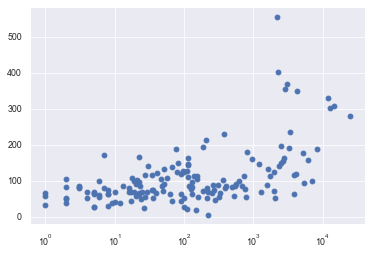

0.5216580056412812


In [20]:
#Print the dataframe and print correlation

corr, _ = pearsonr(df_alles_test['Amount of attacks'], df_alles_test['Mentions of terrorism'])
x = df_alles_test[["Mentions of terrorism","Amount of attacks"]]

Y = x["Mentions of terrorism"].values
X = x["Amount of attacks"].values
plt.plot(X, Y, "o")
plt.xscale('log') 
plt.show()
print(corr) 

# Correlation between amount of mentions and amount of killed people

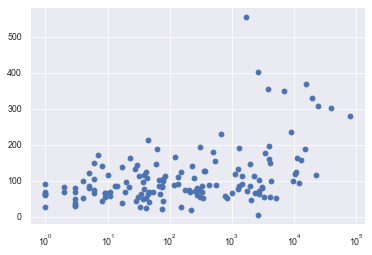

0.42681008705340917


In [21]:
#Print the dataframe and print corr
corr, _ = pearsonr(df_alles_test1['Killed'], df_alles_test1['Mentions of terrorism'])
x = df_alles_test1[["Mentions of terrorism","Killed"]]

Y = x["Mentions of terrorism"].values
X = x["Killed"].values
plt.plot(X, Y, "o")
plt.xscale('log') 
plt.show()
print(corr) 

# Correlation between amount of mentions and amount of wounded people

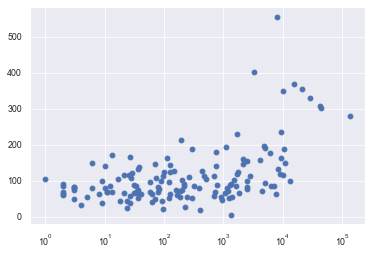

0.4432175877691563


In [22]:
#Print the dataframe and print corr
corr, _ = pearsonr(df_alles_test1['Wounded'], df_alles_test1['Mentions of terrorism'])
x = df_alles_test1[["Mentions of terrorism","Wounded"]]

Y = x["Mentions of terrorism"].values
X = x["Wounded"].values
plt.plot(X, Y, "o")
plt.xscale('log') 
plt.show()
print(corr) 

## Single variable Polynomial Regression

In [23]:
# 1. Select model and import it
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# 2. Select model hyperparameters (here, we will use a polynomial, degree 2, basis function)
polymodel = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True))

# 3. Arrange data in feature matrix (or vector if just 1 feature) and Target array
x = df_alles_test[["Mentions of terrorism","Amount of attacks"]]
#x = df_alles[["Amount of mentions","Amount of attacks", "Killed"]]


Y = x["Mentions of terrorism"].values
X = x["Amount of attacks"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


# 4. Fit model to data
polymodel.fit(X_train[:, np.newaxis], Y_train)


# 5. Apply model

xfit = np.linspace(min(X), max(X), 100)
yfit = polymodel.predict(xfit[:, np.newaxis])

ypred = polymodel.predict(X_test[:, np.newaxis])
print(Y_test[0:5])
print(ypred[0:5])
# The mean squared error
print("Mean squared error - Test: %.2f" % mean_squared_error(Y_test, ypred))
# Explained variance score: 1 is perfect prediction
print('Variance score - Test: %.2f' % r2_score(Y_test, ypred))

[124 6 86 60 51]
[138.07615764  91.41639196 104.17195568  85.64684445 140.08920148]
Mean squared error - Test: 3514.19
Variance score - Test: 0.31


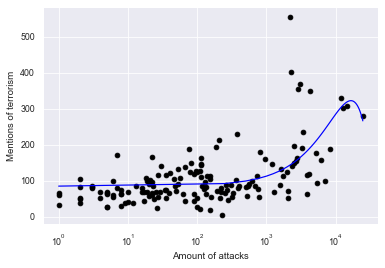

In [24]:
xfit = np.linspace(min(X), max(X), 100)
yfit = polymodel.predict(xfit[:, np.newaxis])

# Plot
fig, ax = plt.subplots()
ax.scatter(X, Y, c='black')
ax.set_xlabel("Amount of attacks")
ax.set_ylabel("Mentions of terrorism")
ax.plot(xfit, yfit, c='blue');
plt.xscale('log') 
plt.show()

## Correlation between amount of mentions of terrorism and democracy index

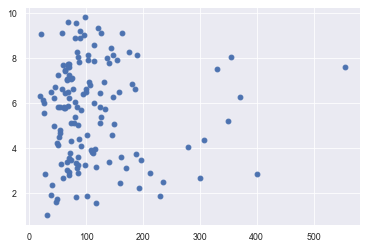

-0.01030822024647567


In [25]:
#Print the dataframe and print correlation
corr, _ = pearsonr(df_alles['Mentions of terrorism'], df_alles['eiu'])
x = df_alles[["Mentions of terrorism","eiu"]]

Y = x["eiu"].values
X = x["Mentions of terrorism"].values
plt.plot(X, Y, "o")
# plt.xscale('log') 
plt.show()
print(corr) 

 Here we can see that relationship between democracy index and amount of mentions of terrorism follows a negative correlation. In fact,there is no correlation between two variables as it is -0.01030822024647567.

## Correlation between amount of mentions of terrorism and amount of attacks

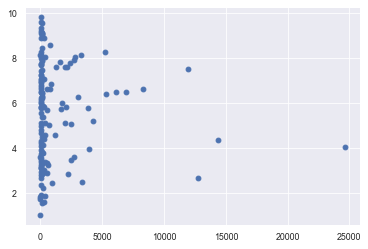

0.5204734196639238


In [26]:
#Print the dataframe and print corr
corr, _ = pearsonr(df_alles['Mentions of terrorism'], df_alles['Amount of attacks'])
x = df_alles[["Amount of attacks","eiu"]]

Y = x["eiu"].values
X = x["Amount of attacks"].values
plt.plot(X, Y, "o")
# plt.xscale('log') 
plt.show()
print(corr) 

## EDA with DEMOCRACY
Here, we are performing the exploratory data analysis with amount of mentions of "democracy" in the general debate.

In [27]:
df_un_clean = df_un.dropna(subset=['Country or Area'])

from collections import defaultdict
d = defaultdict(int)

for i in range(8383):
    
    row = df_un_clean.iloc[i]
   
    a = row['Country or Area']
    
    text = row['Speech']
    words = word_tokenize(text)
    words = preprocess(words)
    
    for w in words:
        if re.match('democra.*', w):
            d[a] += 1
            #print(w)
dict(d)

{'Austria': 96,
 'Mexico': 188,
 'Congo': 270,
 'Algeria': 127,
 'Sri Lanka': 199,
 'Philippines': 132,
 'United Kingdom': 123,
 'Costa Rica': 353,
 'Ecuador': 202,
 'India': 194,
 'Argentina': 166,
 'Albania': 294,
 'Norway': 72,
 'Tunisia': 148,
 'Madagascar': 193,
 'Bolivia (Plurinational State of)': 291,
 'Syrian Arab Republic': 66,
 'Indonesia': 207,
 'Guinea': 178,
 'Japan': 117,
 'Rwanda': 169,
 'Belarus': 131,
 'Ghana': 116,
 'Belgium': 174,
 'Pakistan': 156,
 'France': 125,
 'Dominican Republic': 140,
 'Brazil': 288,
 'Libya': 130,
 'Turkey': 136,
 'Uruguay': 204,
 'Zambia': 132,
 'Iceland': 72,
 'Venezuela (Bolivarian Republic of)': 331,
 'Thailand': 118,
 'Paraguay': 251,
 'Ukraine': 161,
 'Cameroon': 127,
 'Liberia': 173,
 'Kuwait': 30,
 'Iran (Islamic Republic of)': 113,
 'Somalia': 107,
 'Iraq': 93,
 'Haiti': 257,
 'Canada': 129,
 'Morocco': 92,
 'Sudan': 97,
 'Guatemala': 300,
 'US': 340,
 'South Africa': 103,
 'Trinidad and Tobago': 83,
 'Kenya': 113,
 'Cambodia': 366,


In [28]:
#Make dataframe out of mentions of democracy
df_demo = pd.DataFrame([list(d.keys()),list(d.values())]).T
df_demo.columns = ['country' ,  'Mentions of Democracy']

#Merge
df_demo_eiu = pd.merge(df_eiu, df_demo, how='outer')
df_demo_eiu = df_demo_eiu.dropna().sort_values('Mentions of Democracy', ascending = False)
df_demo_eiu

,country,eiu,Mentions of Democracy
111,North Korea,1.057500,536
45,El Salvador,6.409167,436
99,Mongolia,6.500833,367
23,Cambodia,4.417500,366
28,Chile,7.803333,357
...,...,...,...
47,Eritrea,2.363333,21
153,Turkmenistan,1.756667,20
114,Oman,3.063333,19
142,Switzerland,9.074167,10


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


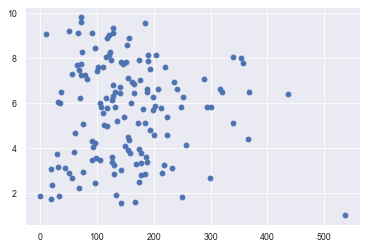

In [29]:
import matplotlib.pyplot as plt
plt.plot(df_demo_eiu['Mentions of Democracy'], df_demo_eiu['eiu'], "o")
plt.show()

In [30]:
#### Find countries which has lowest democracy index 
df_eiu.nsmallest(5, 'eiu') 

,country,eiu
111,North Korea,1.057500
27,Chad,1.554167
26,Central African Republic,1.635000
153,Turkmenistan,1.756667
143,Syria,1.768333


In [31]:
#### Find countries which has largest democracy index
df_eiu.nlargest(5,'eiu')

,country,eiu
113,Norway,9.840833
67,Iceland,9.613333
141,Sweden,9.580000
40,Denmark,9.338333
107,New Zealand,9.233333


In [32]:
#Make a dataframe out of mentions of democracy, democracy index and amount of attacks
df_mentions_eiu_attacks = pd.merge(df_demo_eiu, df_testt, how='outer')
df_mentions_eiu_attacks.shape

(210, 4)

In [33]:
df_mentions_eiu_attacks = df_mentions_eiu_attacks.dropna().sort_values('Mentions of Democracy', ascending = False)
df_mentions_eiu_attacks

,country,eiu,Mentions of Democracy,Amount of attacks
0,North Korea,1.057500,536,1.0
1,El Salvador,6.409167,436,5320.0
3,Cambodia,4.417500,366,259.0
4,Chile,7.803333,357,2365.0
5,Costa Rica,8.025000,353,67.0
...,...,...,...,...
139,Kuwait,3.730833,30,76.0
140,Eritrea,2.363333,21,10.0
141,Turkmenistan,1.756667,20,2.0
143,Switzerland,9.074167,10,111.0


In [34]:
df_final = pd.merge(df_mentions_eiu_attacks, df_alles, how='outer')
df_final

,country,eiu,Mentions of Democracy,Amount of attacks,Killed,Wounded,Mentions of terrorism
0,North Korea,1.057500,536,1.0,3.0,4.0,32
1,El Salvador,6.409167,436,5320.0,12053.0,5062.0,95
2,Cambodia,4.417500,366,259.0,543.0,786.0,87
3,Chile,7.803333,357,2365.0,228.0,755.0,141
4,Costa Rica,8.025000,353,67.0,17.0,38.0,137
...,...,...,...,...,...,...,...
135,Kuwait,3.730833,30,76.0,63.0,300.0,188
136,Eritrea,2.363333,21,10.0,46.0,62.0,41
137,Turkmenistan,1.756667,20,2.0,3.0,3.0,49
138,Switzerland,9.074167,10,111.0,74.0,94.0,21


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


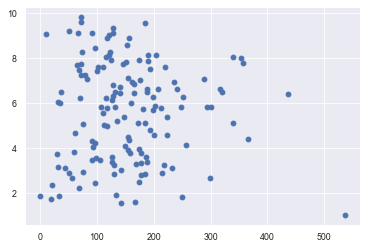

In [35]:
import matplotlib.pyplot as plt
plt.plot(df_mentions_eiu_attacks['Mentions of Democracy'], df_mentions_eiu_attacks['eiu'], "o")
plt.show()

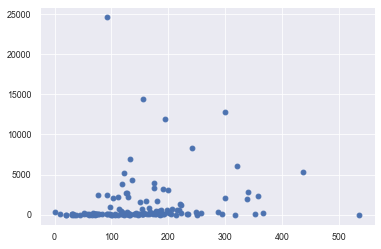

In [36]:
import matplotlib.pyplot as plt
plt.plot(df_mentions_eiu_attacks['Mentions of Democracy'], df_mentions_eiu_attacks['Amount of attacks'], "o")
plt.show()

In [37]:
#Get dictionary for mentions of democracy
from collections import defaultdict
d_ment = defaultdict(int)
#rlist = np.random.randint(1000, size=1000)
for i in range(8383):
    row = df_un_clean.iloc[i]
    a = row['Country or Area']
    text = row['Speech']
    words = word_tokenize(text)
    words = preprocess(words)
    word_count = 0
    for w in words:
        if re.match('democra.*', w):
            word_count += 1
            d_ment[a] += 1            
dict(d_ment)

{'Austria': 96,
 'Mexico': 188,
 'Congo': 270,
 'Algeria': 127,
 'Sri Lanka': 199,
 'Philippines': 132,
 'United Kingdom': 123,
 'Costa Rica': 353,
 'Ecuador': 202,
 'India': 194,
 'Argentina': 166,
 'Albania': 294,
 'Norway': 72,
 'Tunisia': 148,
 'Madagascar': 193,
 'Bolivia (Plurinational State of)': 291,
 'Syrian Arab Republic': 66,
 'Indonesia': 207,
 'Guinea': 178,
 'Japan': 117,
 'Rwanda': 169,
 'Belarus': 131,
 'Ghana': 116,
 'Belgium': 174,
 'Pakistan': 156,
 'France': 125,
 'Dominican Republic': 140,
 'Brazil': 288,
 'Libya': 130,
 'Turkey': 136,
 'Uruguay': 204,
 'Zambia': 132,
 'Iceland': 72,
 'Venezuela (Bolivarian Republic of)': 331,
 'Thailand': 118,
 'Paraguay': 251,
 'Ukraine': 161,
 'Cameroon': 127,
 'Liberia': 173,
 'Kuwait': 30,
 'Iran (Islamic Republic of)': 113,
 'Somalia': 107,
 'Iraq': 93,
 'Haiti': 257,
 'Canada': 129,
 'Morocco': 92,
 'Sudan': 97,
 'Guatemala': 300,
 'US': 340,
 'South Africa': 103,
 'Trinidad and Tobago': 83,
 'Kenya': 113,
 'Cambodia': 366,


In [38]:
df_mentions_eiu_attacks.nsmallest(5,'eiu')

,country,eiu,Mentions of Democracy,Amount of attacks
0,North Korea,1.057500,536,1.0
71,Chad,1.554167,143,91.0
54,Central African Republic,1.635000,167,283.0
141,Turkmenistan,1.756667,20,2.0
16,Equatorial Guinea,1.855833,250,2.0


In [39]:
df_mentions_eiu_attacks.nlargest(5,'eiu')

,country,eiu,Mentions of Democracy,Amount of attacks
120,Norway,9.840833,72,19.0
121,Iceland,9.613333,72,4.0
42,Sweden,9.580000,184,132.0
81,Denmark,9.338333,129,41.0
131,New Zealand,9.233333,52,20.0


In [40]:
df_northkorea_low = df_un.loc[df_un['Country or Area'] == 'North Korea']
df_Norway_top =df_un.loc[df_un['Country or Area'] == 'Norway']

In [41]:
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    words = [word.lower() for word in words if word.isalpha()]
    for w in words:
        if (w not in sw):
            #print(w)
            w = lemmatiser.lemmatize(w, pos='v')
            #print(w)
            no_sw.append(w)
    return no_sw

text = df_northkorea_low["Speech"]
words = []
df = df_northkorea_low.head(10)
for year, row in df.iterrows():
    text = row['Speech']
    words_n = word_tokenize(text)
    words = words + preprocess(words_n)
    #print(len(words_n))
print(len(words))

northkorea_freq = set(FreqDist(words))
#chad_freq.plot(20)

16618


In [42]:
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    words = [word.lower() for word in words if word.isalpha()]
    for w in words:
        if (w not in sw):
            #print(w)
            w = lemmatiser.lemmatize(w, pos='v')
            #print(w)
            no_sw.append(w)
    return no_sw

text = df_Norway_top["Speech"]
words = []
df = df_Norway_top.head(10)
for year, row in df.iterrows():
    text = row['Speech']
    words_n = word_tokenize(text)
    words = words + preprocess(words_n)
    #print(len(words_n))
print(len(words))

norway_freq = set(FreqDist(words))
#print(norway_freq)
new_freq = northkorea_freq - norway_freq

new_freq

15208


{'friendship',
 'sihanouk',
 'object',
 'vividly',
 'separately',
 'continents',
 'autonomous',
 'ignorant',
 'ideology',
 'bless',
 'fictitious',
 'settle',
 'stem',
 'homogenous',
 'flag',
 'land',
 'sceptical',
 'star',
 'elementary',
 'phenomena',
 'scientists',
 'soil',
 'crumble',
 'latin',
 'atone',
 'reelect',
 'doctrines',
 'emotional',
 'apprehension',
 'happiness',
 'prerequisites',
 'deeds',
 'favour',
 'standpoint',
 'consolidate',
 'standstill',
 'slander',
 'confrontational',
 'innovative',
 'memory',
 'onlookers',
 'fairness',
 'father',
 'fabricate',
 'panmunjom',
 'skill',
 'pyongyang',
 'handedly',
 'fastest',
 'unaware',
 'marginalization',
 'disturbance',
 'mourners',
 'dispel',
 'worse',
 'legacies',
 'identity',
 'untold',
 'disguise',
 'liquidation',
 'otherwise',
 'satisfy',
 'intense',
 'fewer',
 'completely',
 'reactor',
 'sun',
 'collusion',
 'belligerency',
 'defence',
 'infringement',
 'nationals',
 'provocative',
 'conform',
 'label',
 'name',
 'proud',
 

In [43]:
ne_freq = norway_freq - northkorea_freq
ne_freq


{'sessions',
 'notable',
 'industrialization',
 'limitation',
 'fisheries',
 'atrocities',
 'interpretation',
 'hundred',
 'dynamic',
 'federal',
 'racism',
 'attainment',
 'massive',
 'overlook',
 'annex',
 'rhodesia',
 'employment',
 'utilization',
 'arouse',
 'factories',
 'revise',
 'indigenous',
 'larger',
 'month',
 'back',
 'spokesman',
 'guess',
 'schedule',
 'latest',
 'defensive',
 'hamper',
 'compulsory',
 'trace',
 'unifil',
 'table',
 'flexible',
 'connexion',
 'producers',
 'explosions',
 'deficit',
 'adjustment',
 'applicable',
 'supervision',
 'study',
 'speech',
 'discourage',
 'lxii',
 'thorn',
 'pakistani',
 'interdependence',
 'angle',
 'absent',
 'laws',
 'impressive',
 'salvador',
 'mere',
 'market',
 'rhetoric',
 'commodities',
 'grateful',
 'contemplate',
 'asylum',
 'machine',
 'openness',
 'whatever',
 'continent',
 'reaffirmation',
 'xxii',
 'smith',
 'populations',
 'comprise',
 'eye',
 'motivate',
 'alike',
 'protein',
 'optimum',
 'refugees',
 'distributiv

In [44]:
#Make dataframe out of mentions
df_mentions_demo = pd.DataFrame([list(d_ment.keys()),list(d_ment.values())]).T

df_mentions_demo.columns = ['country' , 'Mentions of Democracy']
#display(df_mentions)

df_all = pd.merge(df_mentions_demo,df_mentions_eiu_attacks, how='outer').dropna()
df_all

,country,Mentions of Democracy,eiu,Amount of attacks
0,Austria,96,8.479167,115.0
1,Mexico,188,6.625833,524.0
3,Algeria,127,3.620000,2743.0
4,Sri Lanka,199,6.281667,3022.0
5,Philippines,132,6.513333,6908.0
...,...,...,...,...
179,Eritrea,21,2.363333,10.0
182,Turkmenistan,20,1.756667,2.0
189,Switzerland,10,9.074167,111.0
192,Serbia,37,6.499167,12.0


## Correlation between amount of mentions of democracy and democracy index

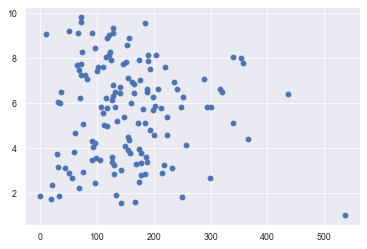

-0.012227317256004039


In [45]:
#Print the dataframe and print correlation
corr, _ = pearsonr(df_all['Mentions of Democracy'], df_all['eiu'])
x = df_all[["Mentions of Democracy","eiu"]]

Y = x["eiu"].values
X = x["Mentions of Democracy"].values
plt.plot(X, Y, "o")
# plt.xscale('log') 
plt.show()
print(corr) 

## Correlation between amount of mentions of democracy and amount of attacks

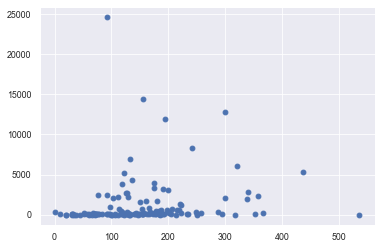

0.1417840680875416


In [46]:
#Print the dataframe and print correlation
corr, _ = pearsonr(df_all['Mentions of Democracy'], df_all['Amount of attacks'])
x = df_all[["Mentions of Democracy","Amount of attacks"]]

Y = x["Amount of attacks"].values
X = x["Mentions of Democracy"].values
plt.plot(X, Y, "o")
# plt.xscale('log') 
plt.show()
print(corr) 

## Linear Regression

In [47]:
# 1. Select model and import it
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# 2. Select model hyperparameters (here, we will use a polynomial, degree 2, basis function)
polymodel = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True))

# 3. Arrange data in feature matrix (or vector if just 1 feature) and Target array
x = df_all[["Mentions of Democracy","eiu"]]
#x = df_alles[["Amount of mentions","Amount of attacks", "Killed"]]


Y = x["Mentions of Democracy"].values
X = x["eiu"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


# 4. Fit model to data
polymodel.fit(X_train[:, np.newaxis], Y_train)


# 5. Apply model

xfit = np.linspace(min(X), max(X), 100)
yfit = polymodel.predict(xfit[:, np.newaxis])

ypred = polymodel.predict(X_test[:, np.newaxis])
print(Y_test[0:5])
print(ypred[0:5])
# The mean squared error
print("Mean squared error - Test: %.2f" % mean_squared_error(Y_test, ypred))
# Explained variance score: 1 is perfect prediction
print('Variance score - Test: %.2f' % r2_score(Y_test, ypred))

[113 92 202 31 162]
[172.46977446 127.11661251 177.60426391 177.69804831 173.02251294]
Mean squared error - Test: 8743.43
Variance score - Test: -0.21


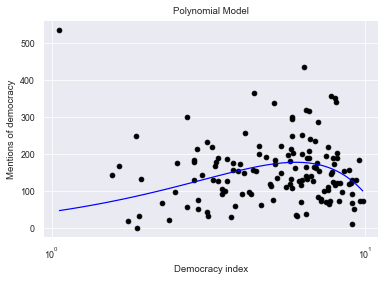

In [48]:
xfit = np.linspace(min(X), max(X), 100)
yfit = polymodel.predict(xfit[:, np.newaxis])

# Plot
fig, ax = plt.subplots()
ax.scatter(X, Y, c='black')
plt.title('Polynomial Model')
ax.set_xlabel("Democracy index")
ax.set_ylabel("Mentions of democracy")
ax.plot(xfit, yfit, c='blue');
plt.savefig('Democracy_model.png')
plt.xscale('log') 
plt.show()

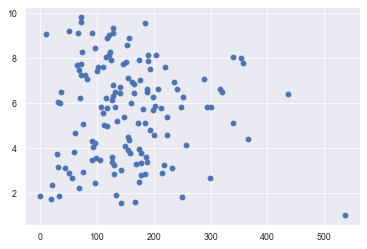

-0.012227317256004039


In [50]:
#Print the dataframe and print correlation
corr, _ = pearsonr(df_all['Mentions of Democracy'], df_all['eiu'])
x = df_all[["Mentions of Democracy","eiu"]]

Y = x["eiu"].values
X = x["Mentions of Democracy"].values
plt.plot(X, Y, "o")
# plt.xscale('log') 
plt.show()
print(corr) 

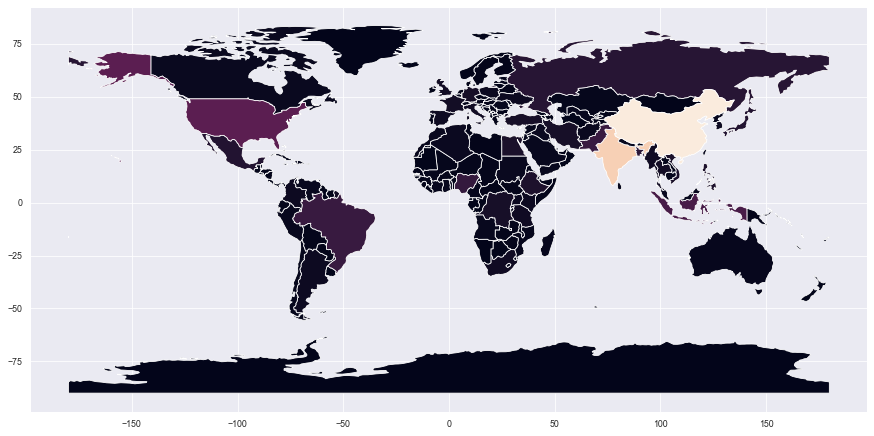

In [51]:
import geopandas as gpd
import pandas as pd

# below we will read data already included in GeoPandas, with info about countries
# notice the column geometry that includes the polygon of each country

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot("pop_est", figsize=(15,10))

In [52]:
world = world.replace('United States of America', 'US')

In [53]:
# Create a (Geo)DataFrame based on imported data

world_democracy_final = world.merge(df_mentions_eiu_attacks, how="left", left_on=['name'], right_on=['country'])
world_democracy_final.dropna().sort_values('Amount of attacks', ascending = False)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,eiu,Mentions of Democracy,Amount of attacks
87,39192111,Asia,Iraq,IRQ,596700.0,"POLYGON ((39.19547 32.16101, 38.79234 33.37869...",Iraq,4.043333,93,24636.0
102,204924861,Asia,Pakistan,PAK,988200.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",Pakistan,4.395000,156,14368.0
103,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2.705000,299,12731.0
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,7.508333,194,11960.0
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",Colombia,6.658333,241,8306.0
...,...,...,...,...,...,...,...,...,...,...
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,6.013333,35,5.0
144,339747,Europe,Iceland,ISL,16150.0,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",Iceland,9.613333,72,4.0
80,2051363,Africa,Gambia,GMB,3387.0,"POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Gambia,3.632500,186,3.0
106,5351277,Asia,Turkmenistan,TKM,94720.0,"POLYGON ((52.50246 41.78332, 52.94429 42.11603...",Turkmenistan,1.756667,20,2.0


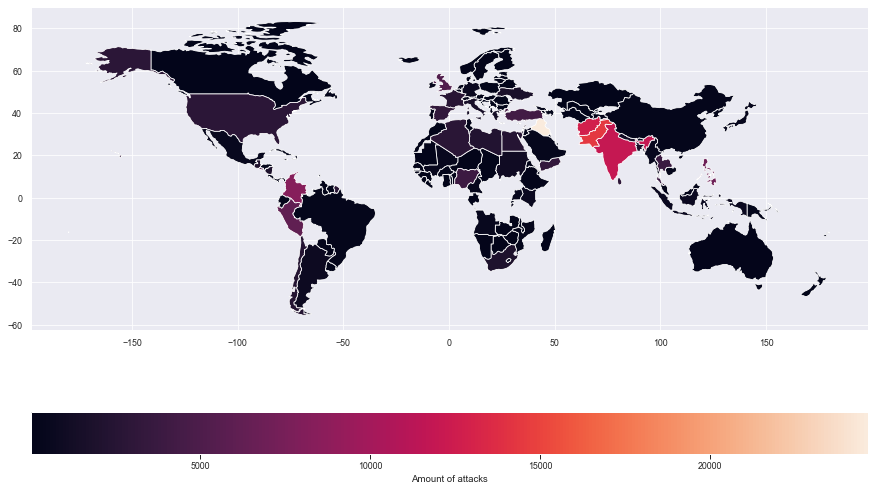

In [54]:
import matplotlib.pyplot as plt

world_democracy_final.plot("Amount of attacks", 
                           figsize=(15,10),
                           legend=True,
                           edgecolor="white",
                           legend_kwds={"label":"Amount of attacks", "orientation":"horizontal"})

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


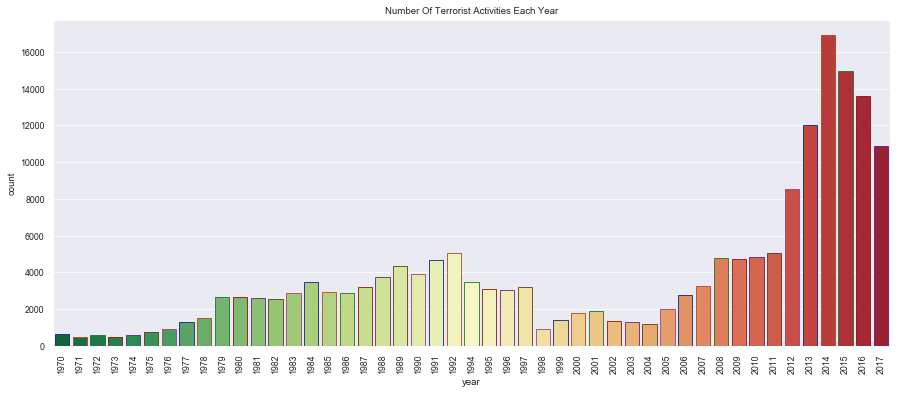

In [55]:
plt.subplots(figsize=(15,6))
sns.countplot('year',data=df_terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


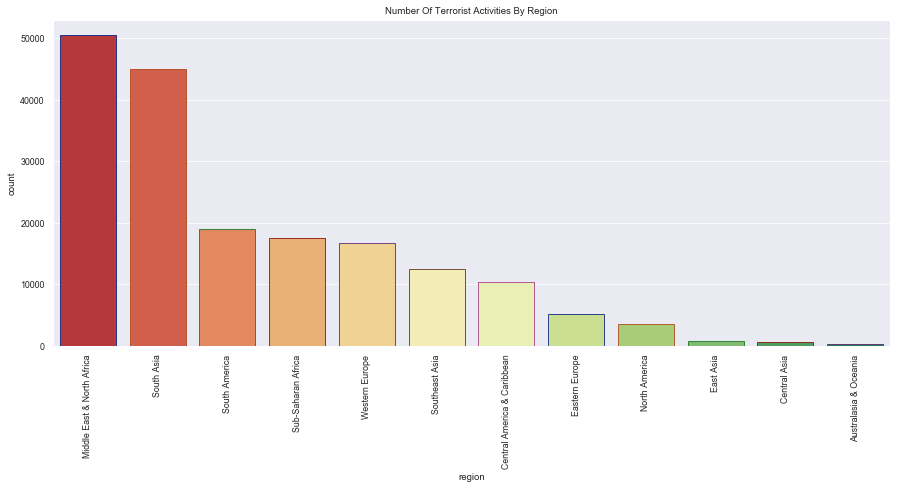

In [57]:
plt.subplots(figsize=(15,6))
sns.countplot('region',data=df_terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df_terror['region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()